In [1]:
import pandas as pd
import matplotlib.pyplot as plt   
from pathlib import Path
import requests
import json
from census import Census
from us import states
import numpy as np

In [2]:
api_key = "1a075ccdd14f7502695aa6696d73d28a29c0565e"
# base_url = "http://api.census.gov/data.json"
# base_url = "http://api.census.gov/data/2022/cps/asec/mar"
# response = requests.get(base_url)
# print(response.url)

In [3]:
census_client = Census(api_key)
state_code = states.CA.fips

variables = [
    "NAME",
    "B01003_001E", # Total population
    "B15003_002E", # Number of people with no high school diploma
    "B15003_022E",  # Number of people with a Bachelor's degree
    "B15003_025E",  # Number of people with a graduate degree

]

# Fetch the data for all counties in California
data = census_client.acs5.state_county(variables, state_code, Census.ALL, year = 2021)

# Create a DataFrame from the fetched data
df = pd.DataFrame(data)

# Print the DataFrame
#print(df.head())

In [4]:
file_path = "C:/Users/evacs/Downloads/experiencing_homelessness-gender_demographics.csv"
county_data = pd.read_csv(file_path)
county_data

,CALENDAR_YEAR,COC_ID,COC_NAME,GENDER,EXPERIENCING_HOMELESSNESS_CNT
0,2017,All,California,Female,79356
1,2017,All,California,Male,101589
2,2017,All,California,Non-Singular Gender,142
3,2017,All,California,Questioning Gender,*
4,2017,All,California,Transgender,674
...,...,...,...,...,...
1459,2023 Q1,CA-614,San Luis Obispo County CoC,Female,989
1460,2023 Q1,CA-614,San Luis Obispo County CoC,Male,1239
1461,2023 Q1,CA-614,San Luis Obispo County CoC,Non-Singular Gender,*
1462,2023 Q1,CA-614,San Luis Obispo County CoC,Transgender,*


In [5]:
year_2021 = county_data[county_data['CALENDAR_YEAR']=="2021"]
year_2021

,CALENDAR_YEAR,COC_ID,COC_NAME,GENDER,EXPERIENCING_HOMELESSNESS_CNT
779,2021,All,California,Female,112966
780,2021,All,California,Male,153599
781,2021,All,California,Non-Singular Gender,620
782,2021,All,California,Questioning Gender,20
783,2021,All,California,Transgender,1333
...,...,...,...,...,...
995,2021,CA-614,San Luis Obispo County CoC,Female,1019
996,2021,CA-614,San Luis Obispo County CoC,Male,1319
997,2021,CA-614,San Luis Obispo County CoC,Non-Singular Gender,*
998,2021,CA-614,San Luis Obispo County CoC,Transgender,*


In [6]:
alls = year_2021[year_2021['COC_ID']=="All"].index
no_all = year_2021.drop(alls)
#no_all

In [7]:
stars = no_all[no_all['EXPERIENCING_HOMELESSNESS_CNT']=="*"].index
no_stars = no_all.drop(stars)
#no_stars

In [8]:
no_stars['EXPERIENCING_HOMELESSNESS_CNT'] = no_stars['EXPERIENCING_HOMELESSNESS_CNT'].astype(int)

In [9]:
no_gender = no_stars.drop('GENDER', axis=1)
#no_gender


In [10]:
grouped_sum = no_stars.groupby('COC_NAME')['EXPERIENCING_HOMELESSNESS_CNT'].sum().reset_index()
#grouped_sum

In [11]:
LA_rows= grouped_sum[grouped_sum['COC_NAME'].str.contains('Angeles')]
LA_total = LA_rows['EXPERIENCING_HOMELESSNESS_CNT'].sum()
LA_new = {'COC_NAME': 'Los Angeles County', 'EXPERIENCING_HOMELESSNESS_CNT': LA_total}
grouped_sum = grouped_sum.append(LA_new, ignore_index=True)


In [12]:
print(LA_total)

90726


In [13]:
homeless_df = grouped_sum.drop([8,14,15,23])
#homeless_df

In [14]:
homeless_df =homeless_df.reset_index(drop=True)
homeless_df

,COC_NAME,EXPERIENCING_HOMELESSNESS_CNT
0,Alameda County CoC,10078
1,"Alpine, Inyo, Mono Counties CoC",227
2,"Amador, Calaveras, Mariposa, Tuolumne Counties...",373
3,Butte County CoC,1957
4,"Colusa, Glenn, Trinity Counties CoC",676
5,Contra Costa County CoC,6967
6,El Dorado County CoC,330
7,"Fresno, Madera Counties CoC",6224
8,Humboldt County CoC,1684
9,Imperial County CoC,1668


In [15]:
df = df.drop('state', axis=1)
df = df.drop('county',axis=1)
df.keys()

Index(['NAME', 'B01003_001E', 'B15003_002E', 'B15003_022E', 'B15003_025E'], dtype='object')

In [16]:
columns = ['Name', 'Pop', 'No HS Diploma', 'Bachelors', 'Grad']
df.columns = columns
df.keys()

Index(['Name', 'Pop', 'No HS Diploma', 'Bachelors', 'Grad'], dtype='object')

In [17]:
a = "Alpine, Inyo, Mono"
b = "Amador, Calaveras, Mariposa, Tuolumne"
c = "Colusa, Glenn, Trinity"
d = "Fresno, Madera"
e = "Kings, Tulare"
f = "Monterey, San Benito"
g = "Shasta, Siskiyou, Lassen, Plumas, Del Norte, Modoc, Sierra"
h = "Yuba, Sutter"

In [18]:
df.loc[[1,13,25], 'Name']=[a,a,a]
df.loc[[2,4,21,54], 'Name']=[b,b,b,b]
df. loc[[5,10,52], 'Name']=[c,c,c]
df.loc[[9,19], 'Name']=[d,d]
df.loc[[15,53], 'Name']=[e,e]
df.loc[[26,34], 'Name']=[f,f]
df.loc[[44,46,17,31,7,24,45], 'Name']=[g,g,g,g,g,g,g]
df.loc[[50,57], 'Name']=[h,h]

In [19]:
edu_df = df.groupby('Name').sum().reset_index()
edu_df
#.reset_index(drop = True)

,Name,Pop,No HS Diploma,Bachelors,Grad
0,"Alameda County, California",1673133.0,31416.0,337847.0,36967.0
1,"Alpine, Inyo, Mono",33439.0,141.0,4250.0,328.0
2,"Amador, Calaveras, Mariposa, Tuolumne",157912.0,1148.0,18634.0,903.0
3,"Butte County, California",217884.0,2195.0,27819.0,1813.0
4,"Colusa, Glenn, Trinity",66273.0,1488.0,5227.0,360.0
5,"Contra Costa County, California",1161643.0,16081.0,218293.0,17836.0
6,"El Dorado County, California",190568.0,717.0,34494.0,1739.0
7,"Fresno, Madera",1159454.0,30864.0,104575.0,5478.0
8,"Humboldt County, California",137014.0,1000.0,19376.0,1308.0
9,"Imperial County, California",180051.0,4245.0,12239.0,281.0


In [20]:
edu_df['% no hsd']=edu_df['No HS Diploma']/edu_df['Pop']*100
edu_df['% Bach']=edu_df['Bachelors']/edu_df['Pop']*100
edu_df['% Grad']=edu_df['Grad']/edu_df['Pop']*100
# pd.options.display.float_format = {:,.2f}.format
edu_df.head()

,Name,Pop,No HS Diploma,Bachelors,Grad,% no hsd,% Bach,% Grad
0,"Alameda County, California",1673133.0,31416.0,337847.0,36967.0,1.877675,20.192477,2.209448
1,"Alpine, Inyo, Mono",33439.0,141.0,4250.0,328.0,0.421663,12.709710,0.980891
2,"Amador, Calaveras, Mariposa, Tuolumne",157912.0,1148.0,18634.0,903.0,0.726987,11.800243,0.571837
3,"Butte County, California",217884.0,2195.0,27819.0,1813.0,1.007417,12.767803,0.832094
4,"Colusa, Glenn, Trinity",66273.0,1488.0,5227.0,360.0,2.245258,7.887073,0.543208


In [21]:
edu_df

,Name,Pop,No HS Diploma,Bachelors,Grad,% no hsd,% Bach,% Grad
0,"Alameda County, California",1673133.0,31416.0,337847.0,36967.0,1.877675,20.192477,2.209448
1,"Alpine, Inyo, Mono",33439.0,141.0,4250.0,328.0,0.421663,12.709710,0.980891
2,"Amador, Calaveras, Mariposa, Tuolumne",157912.0,1148.0,18634.0,903.0,0.726987,11.800243,0.571837
3,"Butte County, California",217884.0,2195.0,27819.0,1813.0,1.007417,12.767803,0.832094
4,"Colusa, Glenn, Trinity",66273.0,1488.0,5227.0,360.0,2.245258,7.887073,0.543208
5,"Contra Costa County, California",1161643.0,16081.0,218293.0,17836.0,1.384332,18.791746,1.535411
6,"El Dorado County, California",190568.0,717.0,34494.0,1739.0,0.376244,18.100625,0.912535
7,"Fresno, Madera",1159454.0,30864.0,104575.0,5478.0,2.661943,9.019332,0.472464
8,"Humboldt County, California",137014.0,1000.0,19376.0,1308.0,0.729852,14.141621,0.954647
9,"Imperial County, California",180051.0,4245.0,12239.0,281.0,2.357665,6.797518,0.156067


In [22]:
# no_hs_dip = edu_df.sort_values(by='% no hsd',ascending=False)
# no_hs_dip.head(10)

In [23]:
homeless_df = homeless_df.sort_values(by='COC_NAME').reset_index(drop = True)
edu_df = edu_df.sort_values(by='Name')
homeless_df

,COC_NAME,EXPERIENCING_HOMELESSNESS_CNT
0,Alameda County CoC,10078
1,"Alpine, Inyo, Mono Counties CoC",227
2,"Amador, Calaveras, Mariposa, Tuolumne Counties...",373
3,Butte County CoC,1957
4,"Colusa, Glenn, Trinity Counties CoC",676
5,Contra Costa County CoC,6967
6,El Dorado County CoC,330
7,"Fresno, Madera Counties CoC",6224
8,Humboldt County CoC,1684
9,Imperial County CoC,1668


In [24]:
# homeless_df.reset_index(drop=True)

In [25]:
edu_df['Homeless Count'] = homeless_df['EXPERIENCING_HOMELESSNESS_CNT']
edu_df['% Homeless']=edu_df['Homeless Count']/edu_df['Pop']*100
edu_df = edu_df.applymap(lambda x: '{:.2f}'.format(x) if isinstance(x, float) else x)


In [26]:
edu_df['% Homeless']=edu_df['% Homeless'].astype(float)
edu_df['% no hsd']=edu_df['% no hsd'].astype(float)

In [27]:
no_hs_df = edu_df.nlargest(10, '% no hsd')

In [28]:
no_hs_df

,Name,Pop,No HS Diploma,Bachelors,Grad,% no hsd,% Bach,% Grad,Homeless Count,% Homeless
16,"Merced County, California",279150.00,8317.00,15979.00,827.00,2.98,5.72,0.30,4632,1.66
13,"Los Angeles County, California",10019635.00,277065.00,1530075.00,97554.00,2.77,15.27,0.97,90726,0.91
7,"Fresno, Madera",1159454.00,30864.00,104575.00,5478.00,2.66,9.02,0.47,6224,0.54
27,"San Joaquin County, California",771406.00,20402.00,64170.00,3291.00,2.64,8.32,0.43,6742,0.87
26,"San Francisco County, California",865933.00,22410.00,243795.00,20420.00,2.59,28.15,2.36,13904,1.61
11,"Kings, Tulare",622886.00,15804.00,37506.00,1289.00,2.54,6.02,0.21,3431,0.55
40,"Yuba, Sutter",179484.00,4481.00,14605.00,714.00,2.50,8.14,0.40,2165,1.21
18,"Napa County, California",138795.00,3416.00,24141.00,1302.00,2.46,17.39,0.94,747,0.54
9,"Imperial County, California",180051.00,4245.00,12239.00,281.00,2.36,6.80,0.16,1668,0.93
4,"Colusa, Glenn, Trinity",66273.00,1488.00,5227.00,360.00,2.25,7.89,0.54,676,1.02


In [29]:
# no_hs_dip = edu_df.sort_values(by='% no hsd',ascending=False)
# no_hs_dip.head(10)


In [30]:
# hs_min = 2.24
# no_hs_df = edu_df[edu_df["% no hsd"]>hs_min]
# no_hs_df
# print(edu_df["% no hsd"])

In [35]:
plt.rcParams['figure.figsize'] = [10, 5]
width = 0.4  # Width of the bars
ind = np.arange(len(no_hs_df))

fig, ax = plt.subplots()
bar1 = ax.bar(ind+ width/2, no_hs_df['% Homeless'], width, label= '% Homeless')
bar2 = ax.bar((ind- width/2, no_hs_df['% no hsd'], width)#, label = '% No HS Diploma')

# Add labels and title
ax.set_xlabel('County')
ax.set_ylabel('Percent')
ax.set_title('% Homeless and % No HS Diploma by County')
ax.set_xticks(ind)
ax.set_xticklabels(no_hs_df['Name'], rotation = 45, ha='right')
ax.legend()

plt.show()

SyntaxError: invalid syntax (<ipython-input-35-6269fbf6160c>, line 10)

In [ ]:

# plt.rcParams['figure.figsize'] = [10, 5]
# ind = no_hs_df['Name']
# fig, ax = plt.subplots()
# bar1 = ax.plot(ind+ width/2, no_hs_df['% Homeless'], label='% Homeless')
# bar2 = ax.plot(ind- width/2, no_hs_df['% no hsd'], label='% No HS Diploma')

# # Add labels and title
# ax.set_xlabel('County')
# ax.set_ylabel('Percent')
# ax.set_title('% Homeless and % No HS Diploma by County')
# ax.set_xticks(ind)
# ax.set_xticklabels(no_hs_df['Name'], rotation = 45, ha='right')
# ax.legend()

# plt.show()

In [60]:
edu_df['% Bach']=edu_df['% Bach'].astype(float)
bach_df = edu_df.nlargest(10, '% Bach')

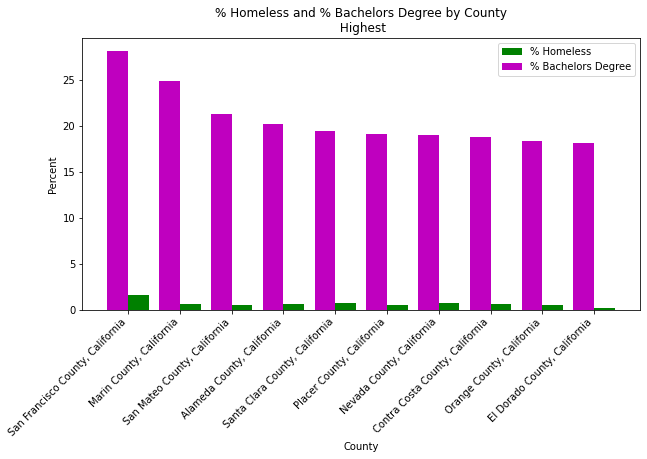

In [61]:
plt.rcParams['figure.figsize'] = [10, 5]

ind = np.arange(len(bach_df))
fig, ax = plt.subplots()
width = .4

bar1 = ax.bar(ind+ width/2, bach_df['% Homeless'],width, label='% Homeless', color = 'g')
bar2 = ax.bar(ind- width/2, bach_df['% Bach'],width,  label='% Bachelors Degree', color = 'm')



# Add labels and title
ax.set_xlabel('County')
ax.set_ylabel('Percent')
ax.set_title('% Homeless and % Bachelors Degree by County\n Highest')
ax.set_xticks(ind)
ax.set_xticklabels(bach_df['Name'], rotation = 45, ha='right')
ax.legend()

#fig.tight_layout()
plt.show()

In [46]:
edu_df['% Bach']=edu_df['% Bach'].astype(float)
bach2_df = edu_df.nsmallest(10, '% Bach')

In [64]:
nohs2_df = edu_df.nsmallest(10, '% no hsd')
grad2_df = edu_df.nsmallest(10, '% Grad')

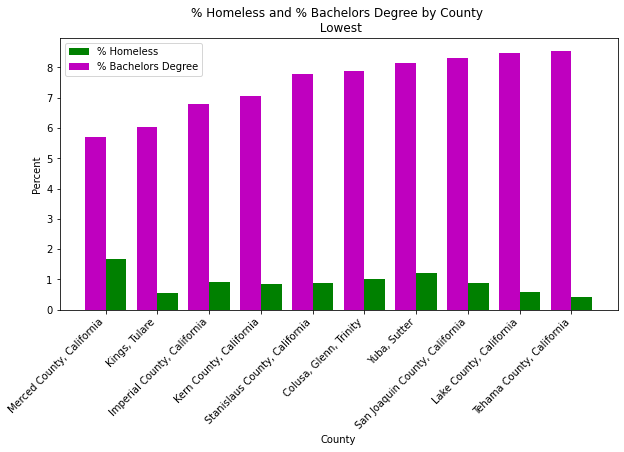

In [53]:
plt.rcParams['figure.figsize'] = [10, 5]

ind = np.arange(len(bach2_df))
fig, ax = plt.subplots()
width = .4

bar1 = ax.bar(ind+ width/2, bach2_df['% Homeless'],width, label='% Homeless', color = 'g')
bar2 = ax.bar(ind- width/2, bach2_df['% Bach'],width,  label='% Bachelors Degree', color = 'm')



# Add labels and title
ax.set_xlabel('County')
ax.set_ylabel('Percent')
ax.set_title('% Homeless and % Bachelors Degree by County \n Lowest')
ax.set_xticks(ind)
ax.set_xticklabels(bach2_df['Name'], rotation = 45, ha='right')
ax.legend()

#fig.tight_layout()
plt.show()

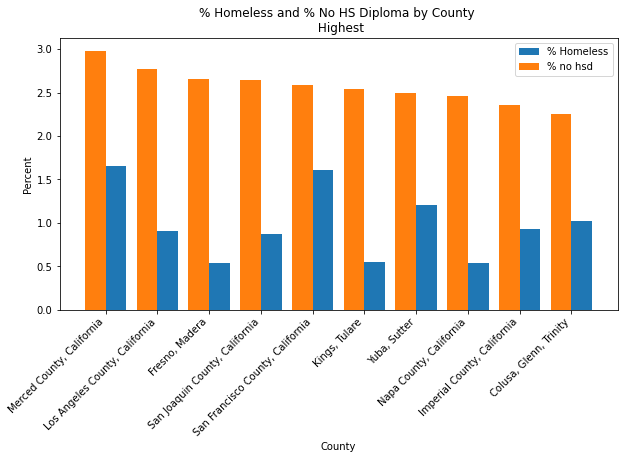

In [55]:
ind = np.arange(len(no_hs_df))
fig, ax = plt.subplots()
width = .4

bar1 = ax.bar(ind+ width/2, no_hs_df['% Homeless'],width, label='% Homeless')
bar2 = ax.bar(ind- width/2, no_hs_df['% no hsd'],width,  label='% no hsd')



# Add labels and title
ax.set_xlabel('County')
ax.set_ylabel('Percent')
ax.set_title('% Homeless and % No HS Diploma by County \n Highest')
ax.set_xticks(ind)
ax.set_xticklabels(no_hs_df['Name'], rotation = 45, ha='right')
ax.legend()

#fig.tight_layout()
plt.show()

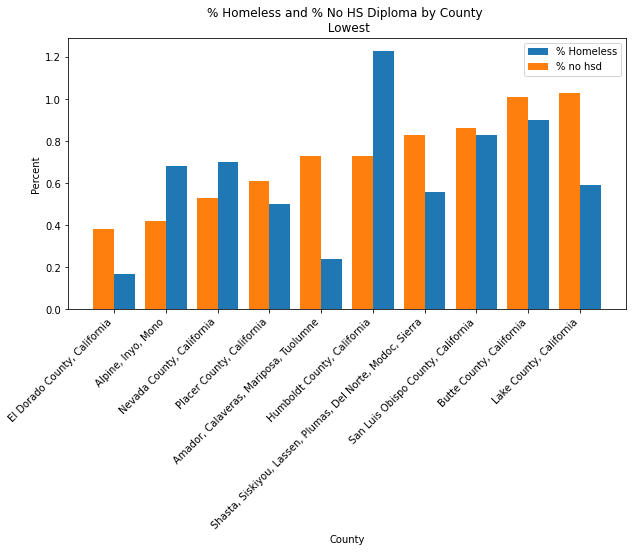

In [59]:
ind = np.arange(len(nohs2_df))
fig, ax = plt.subplots()
width = .4

bar1 = ax.bar(ind+ width/2, nohs2_df['% Homeless'],width, label='% Homeless')
bar2 = ax.bar(ind- width/2, nohs2_df['% no hsd'],width,  label='% no hsd')



# Add labels and title
ax.set_xlabel('County')
ax.set_ylabel('Percent')
ax.set_title('% Homeless and % No HS Diploma by County \n Lowest')
ax.set_xticks(ind)
ax.set_xticklabels(nohs2_df['Name'], rotation = 45, ha='right')
ax.legend()

#fig.tight_layout()
plt.show()

In [44]:
edu_df['% Grad']=edu_df['% Grad'].astype(float)
grad_df = edu_df.nlargest(10, '% Grad')

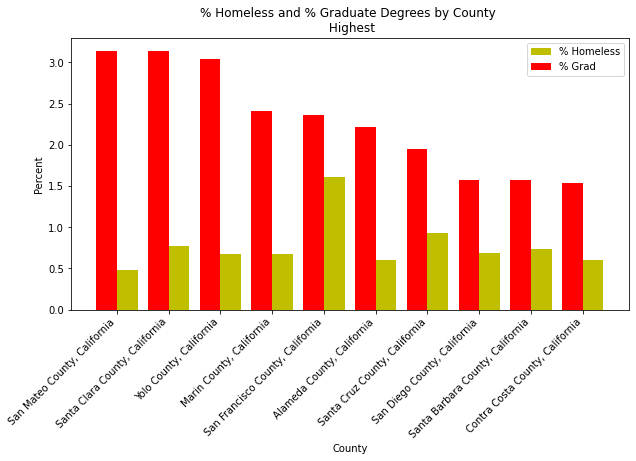

In [62]:
ind = np.arange(len(grad_df))
fig, ax = plt.subplots()
width = .4

bar1 = ax.bar(ind+ width/2, grad_df['% Homeless'],width, label='% Homeless', color = 'y')
bar2 = ax.bar(ind- width/2, grad_df['% Grad'],width,  label='% Grad', color = 'r')



# Add labels and title
ax.set_xlabel('County')
ax.set_ylabel('Percent')
ax.set_title('% Homeless and % Graduate Degrees by County \n Highest')
ax.set_xticks(ind)
ax.set_xticklabels(grad_df['Name'], rotation = 45, ha='right')
ax.legend()

#fig.tight_layout()
plt.show()

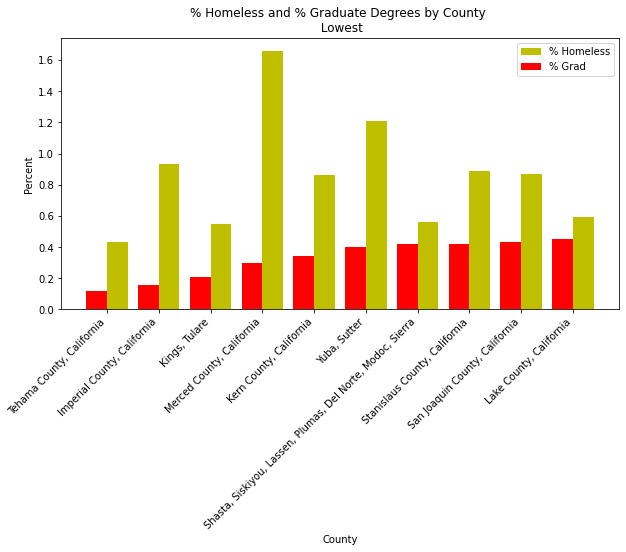

In [65]:
ind = np.arange(len(grad2_df))
fig, ax = plt.subplots()
width = .4

bar1 = ax.bar(ind+ width/2, grad2_df['% Homeless'],width, label='% Homeless', color = 'y')
bar2 = ax.bar(ind- width/2, grad2_df['% Grad'],width,  label='% Grad', color = 'r')



# Add labels and title
ax.set_xlabel('County')
ax.set_ylabel('Percent')
ax.set_title('% Homeless and % Graduate Degrees by County \n Lowest')
ax.set_xticks(ind)
ax.set_xticklabels(grad2_df['Name'], rotation = 45, ha='right')
ax.legend()

#fig.tight_layout()
plt.show()

In [66]:
top_10 = edu_df.nlargest(10, '% Homeless')
low_10 = edu_df.nsmallest(10, '% Homeless')

No handles with labels found to put in legend.


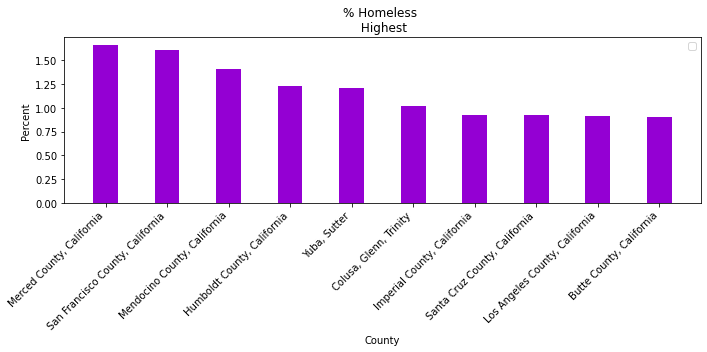

In [69]:
ind = np.arange(len(top_10))
fig, ax = plt.subplots()
width = .4

plt.bar(ind, top_10['% Homeless'],width, color = 'darkviolet')

# Add labels and title
ax.set_xlabel('County')
ax.set_ylabel('Percent')
ax.set_title('% Homeless \n Highest')
ax.set_xticks(ind)
ax.set_xticklabels(top_10['Name'], rotation = 45, ha='right')


fig.tight_layout()
plt.show()